# Testing 12 Technical Indicators With Machine Learning Predictions

In [4]:
import pandas as pd
df = pd.read_csv("USDJPY_Candlestick_1_D_ASK_05.05.2003-19.10.2019.csv")

#Check if NA values are in data
df=df[df['volume']!=0]
df.reset_index(drop=True, inplace=True)
df.isna().sum()
df.tail()

,Local time,open,high,low,close,volume
4292,14.10.2019 00:00:00.000 GMT+0300,108.372,108.525,108.033,108.404,122267.0400
4293,15.10.2019 00:00:00.000 GMT+0300,108.408,108.901,108.157,108.868,161800.8200
4294,16.10.2019 00:00:00.000 GMT+0300,108.878,108.878,108.565,108.792,178244.1800
4295,17.10.2019 00:00:00.000 GMT+0300,108.793,108.941,108.454,108.692,234278.7681
4296,18.10.2019 00:00:00.000 GMT+0300,108.706,108.724,108.388,108.433,148743.3600


In [5]:
import pandas_ta as pa
help(pa.macd)
df.ta.indicators()

Help on function macd in module pandas_ta.momentum.macd:

macd(close, fast=None, slow=None, signal=None, talib=None, offset=None, **kwargs)
    Moving Average Convergence Divergence (MACD)
    
    The MACD is a popular indicator to that is used to identify a security's trend.
    While APO and MACD are the same calculation, MACD also returns two more series
    called Signal and Histogram. The Signal is an EMA of MACD and the Histogram is
    the difference of MACD and Signal.
    
    Sources:
        https://www.tradingview.com/wiki/MACD_(Moving_Average_Convergence/Divergence)
        AS Mode: https://tr.tradingview.com/script/YFlKXHnP/
    
    Calculation:
        Default Inputs:
            fast=12, slow=26, signal=9
        EMA = Exponential Moving Average
        MACD = EMA(close, fast) - EMA(close, slow)
        Signal = EMA(MACD, signal)
        Histogram = MACD - Signal
    
        if asmode:
            MACD = MACD - Signal
            Signal = EMA(MACD, signal)
          

In [6]:
df["RSI"] = pa.rsi(df.close, length=16)
df["CCI"] = pa.cci(df.high, df.low, df.close, length=16)
df["AO"] = pa.ao(df.high, df.low)
df["MOM"] = pa.mom(df.close, length=16)
a = pa.macd(df.close)
df = df.join(a)
df["ATR"] = pa.atr(df.high, df.low, df.close, length=16)
df["BOP"] = pa.bop(df.open, df.high, df.low, df.close, length=16)
df["RVI"] = pa.rvi(df.close)
a = pa.dm(df.high, df.low, length=16)
df = df.join(a)
a = pa.stoch(df.high, df.low, df.close)
df = df.join(a)
a = pa.stochrsi(df.close, length=16)
df = df.join(a)
df["WPR"] = pa.willr(df.high, df.low, df.close, length=16)
#print(pa.macd(df.close))
#help(pa.mom)
#help(pa.cci)
# Get all candle patterns (This is the default behaviour)
#df1 = df.ta.cdl_pattern(name="all")
# Get only one pattern
#df = df.ta.cdl_pattern(name="doji")
# Get some patterns
#df = df.ta.cdl_pattern(name=["doji", "inside"])
#df

In [7]:
a = pa.macd(df.close)
a

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
4292,0.185706,0.063585,0.122121
4293,0.260681,0.110848,0.149833
4294,0.310389,0.128445,0.181945
4295,0.337820,0.124700,0.213120


In [8]:
df.isna().sum()
df.dropna(inplace=True)
df.isna().sum()

Local time             0
open                   0
high                   0
low                    0
close                  0
volume                 0
RSI                    0
CCI                    0
AO                     0
MOM                    0
MACD_12_26_9           0
MACDh_12_26_9          0
MACDs_12_26_9          0
ATR                    0
BOP                    0
RVI                    0
DMP_16                 0
DMN_16                 0
STOCHk_14_3_3          0
STOCHd_14_3_3          0
STOCHRSIk_16_14_3_3    0
STOCHRSId_16_14_3_3    0
WPR                    0
dtype: int64

In [9]:
df.reset_index(drop=True, inplace=True)
df.tail()

,Local time,open,high,low,close,volume,RSI,CCI,AO,MOM,...,ATR,BOP,RVI,DMP_16,DMN_16,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_16_14_3_3,STOCHRSId_16_14_3_3,WPR
4259,14.10.2019 00:00:00.000 GMT+0300,108.372,108.525,108.033,108.404,122267.0400,59.781134,134.765878,0.352465,0.824,...,0.677850,0.065041,56.228437,2.374066,1.680006,85.467174,70.126165,94.461436,70.618297,-10.624418
4260,15.10.2019 00:00:00.000 GMT+0300,108.408,108.901,108.157,108.868,161800.8200,63.560335,153.181876,0.556476,1.313,...,0.681984,0.618280,63.583421,2.601687,1.575006,92.849888,83.586582,99.299924,89.063211,-1.366460
4261,16.10.2019 00:00:00.000 GMT+0300,108.878,108.878,108.565,108.792,178244.1800,62.533717,141.700122,0.771806,1.696,...,0.658923,-0.274760,52.371922,2.439081,1.476568,94.498555,90.938539,97.413426,97.058262,-4.513458
4262,17.10.2019 00:00:00.000 GMT+0300,108.793,108.941,108.454,108.692,234278.7681,61.147546,113.534103,0.935641,0.912,...,0.648177,-0.207392,43.078918,2.286639,1.495282,94.659172,94.002538,93.671550,96.794967,-10.142566
4263,18.10.2019 00:00:00.000 GMT+0300,108.706,108.724,108.388,108.433,148743.3600,57.618993,79.198787,0.928174,0.585,...,0.628666,-0.812500,35.633533,2.143724,1.467827,88.217171,92.458299,82.752306,91.279094,-20.692464


In [10]:
#Target flexible way
pipdiff = 200*1e-4 #for TP
SLTPRatio = 2 #pipdiff/Ratio gives SL
def mytarget(barsupfront, df1):
    length = len(df1)
    high = list(df1['high'])
    low = list(df1['low'])
    close = list(df1['close'])
    open = list(df1['open'])
    trendcat = [None] * length
    for line in range (0,length-barsupfront-2):
        valueOpenLow = 0
        valueOpenHigh = 0
        for i in range(1,barsupfront+2):
            value1 = open[line+1]-low[line+i]
            value2 = open[line+1]-high[line+i]
            valueOpenLow = max(value1, valueOpenLow)
            valueOpenHigh = min(value2, valueOpenHigh)
        #if ( (valueOpenLow >= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 2 # bth limits exceeded
        #elif ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 3 #-1 downtrend
        #elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
        #    trendcat[line] = 1 # uptrend
        #elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 0 # no trend
        #elif ( (valueOpenLow >= (pipdiff/SLTPRatio)) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 5 # light trend down
        #elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 4 # light trend up
            if ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
                trendcat[line] = 1 #-1 downtrend
                break
            elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
                trendcat[line] = 2 # uptrend
                break
            else:
                trendcat[line] = 0 # no clear trend
            
    return trendcat

<Axes: >

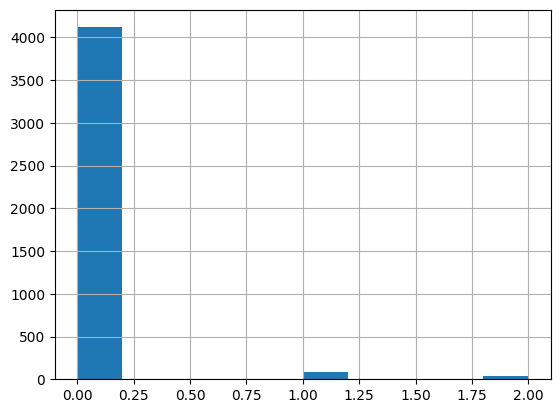

In [11]:
df['Target'] = mytarget(20, df)
df['Target'].hist()
#df.tail(20)
#df['Target'] = df['Target'].astype(int)

In [12]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.tail()

,Local time,open,high,low,close,volume,RSI,CCI,AO,MOM,...,BOP,RVI,DMP_16,DMN_16,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_16_14_3_3,STOCHRSId_16_14_3_3,WPR,Target
4237,12.09.2019 00:00:00.000 GMT+0300,107.832,108.190,107.523,108.142,255294.7904,61.097807,161.378583,0.728915,1.505,...,0.464768,74.338431,2.531691,1.816804,99.033449,97.988090,100.000000,99.739671,-1.285485,0.0
4238,13.09.2019 00:00:00.000 GMT+0300,108.142,108.261,107.907,108.151,178157.5201,61.161300,141.863185,0.989929,1.689,...,0.025424,79.145013,2.444461,1.703254,98.021392,98.767982,100.000000,100.000000,-2.890933,0.0
4239,16.09.2019 00:00:00.000 GMT+0300,107.521,108.171,107.473,108.151,187576.0000,61.161300,107.511862,1.176341,2.678,...,0.902579,79.145013,2.291682,2.030800,96.791777,97.948873,100.000000,100.000000,-2.890933,0.0
4240,17.09.2019 00:00:00.000 GMT+0300,108.155,108.373,108.024,108.133,169250.4312,60.934992,112.844787,1.354788,1.957,...,-0.063037,63.257981,2.350452,1.903875,94.181912,96.331694,99.562518,99.854173,-8.629989,0.0
4241,18.09.2019 00:00:00.000 GMT+0300,108.133,108.479,108.089,108.457,151630.7283,63.526217,110.749997,1.475765,2.683,...,0.830769,70.462918,2.309548,1.784883,95.287973,95.420554,99.562518,99.708345,-0.778485,0.0


In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, log_loss

attributes = ['RSI', 'CCI', 'AO', 'MOM', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'ATR',
       'BOP', 'RVI', 'DMP_16', 'DMN_16', 'STOCHk_14_3_3', 'STOCHd_14_3_3',
       'STOCHRSIk_16_14_3_3', 'STOCHRSId_16_14_3_3', 'WPR']

attributes = ['MACDs_12_26_9', 'ATR', 'DMP_16']

X = df[attributes]
y = df['Target']

train_pct_index = int(0.7 * len(X))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

model = XGBClassifier()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print('****Train Results****')
print("Accuracy: {:.4%}".format(acc_train))
print('****Test Results****')
print("Accuracy: {:.4%}".format(acc_test))

****Train Results****
Accuracy: 100.0000%
****Test Results****
Accuracy: 95.6009%


In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

matrix_train = confusion_matrix(y_train, pred_train)
matrix_test = confusion_matrix(y_test, pred_test)

print(matrix_train)
print(matrix_test)

report_train = classification_report(y_train, pred_train)
report_test = classification_report(y_test, pred_test)

print(report_train)
print(report_test)
#choices = [2, 0, -1, +1]
##choices = [2, 0, 3, +1]
print(model.get_booster().feature_names)

[[2900    0    0]
 [   0   47    0]
 [   0    0   22]]
[[1217    1    0]
 [  38    0    0]
 [  17    0    0]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2900
         1.0       1.00      1.00      1.00        47
         2.0       1.00      1.00      1.00        22

    accuracy                           1.00      2969
   macro avg       1.00      1.00      1.00      2969
weighted avg       1.00      1.00      1.00      2969

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1218
         1.0       0.00      0.00      0.00        38
         2.0       0.00      0.00      0.00        17

    accuracy                           0.96      1273
   macro avg       0.32      0.33      0.33      1273
weighted avg       0.92      0.96      0.94      1273

['MACDs_12_26_9', 'ATR', 'DMP_16']


c:\Users\Serkan POLAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Serkan POLAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Serkan POLAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

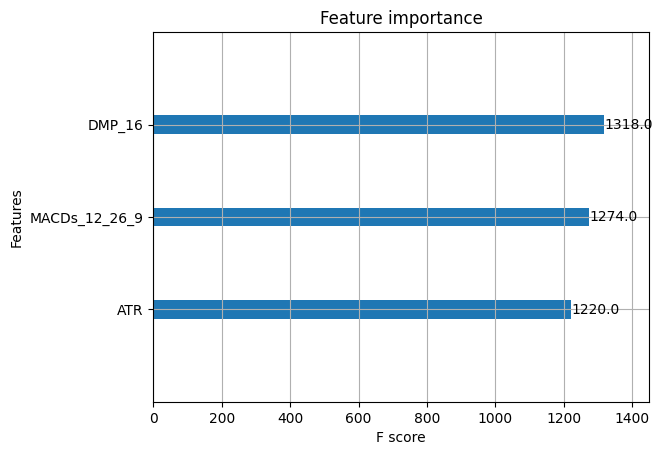

['MACDs_12_26_9', 'ATR', 'DMP_16']


In [15]:
from matplotlib import pyplot
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
#pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
#plot feature importance
plot_importance(model)
pyplot.show()
print(model.get_booster().feature_names)